[View in Colaboratory](https://colab.research.google.com/github/isaacyaf/example/blob/master/titanic_survival_prediction_DNN.ipynb)

# Predict Survival on the Titanic


![ref. kaggle](https://kaggle2.blob.core.windows.net/competitions/kaggle/3136/logos/header.png)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.

ref. kaggle-Titanic

In [1]:

# get titanic & test csv files
!curl -L -o titanic_train.csv "https://drive.google.com/uc?export=download&id=1f0pIaHfXkmnn2UwClM3p3za6H1QvqJDl"
!curl -L -o titanic_test.csv "https://drive.google.com/uc?export=download&id=11cYDt1Pk0jF-0_IFi0YJ3ElAp3EhuSOO"

# pandas, numpy, matplotlib, sns, missingno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re as re

#keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop
from IPython.display import clear_output

#set the jupyter notebook
%matplotlib inline

plt.style.use('ggplot')
def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    
def find_data(df,col,data):
  pd_tmp = pd.DataFrame(columns=df.columns.values)
  if data == None:
    pd_tmp = df[df[col].isna()] 
  else:
    for index, data_tmp in enumerate(df[col]):
      if data in str(data_tmp):
        pd_tmp=pd.concat([pd_tmp,df[index:index+1]])
  return pd_tmp

clear_output()

# get titanic data as a DataFrame
titanic_df = pd.read_csv('titanic_train.csv')
test_df    = pd.read_csv('titanic_test.csv')

full_data = [titanic_df, test_df]

# preview the data
titanic_df.head()

,Unnamed: 0,PassengerId,Pclass,Name,Name_length,Title,Sex,Age,Age_Categories,SibSp,Parch,FamilySize,IsAlone,Ticket,Fare,Fare_Categories,Cabin,Has_Cabin,Embarked,Survived
0,0,1,3,"Braund, Mr. Owen Harris",23,1,1,22.0,1,1,0,2,0,A/5 21171,7.2500,0,NaN,0,0,0
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51,3,0,38.0,2,1,0,2,0,PC 17599,71.2833,3,C85,1,1,1
2,2,3,3,"Heikkinen, Miss. Laina",22,2,0,26.0,1,0,0,1,1,STON/O2. 3101282,7.9250,1,NaN,0,0,1
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44,3,0,35.0,2,1,0,2,0,113803,53.1000,3,C123,1,0,1
4,4,5,3,"Allen, Mr. William Henry",24,1,1,35.0,2,0,0,1,1,373450,8.0500,1,NaN,0,0,0



|Col. Name|Col. Explanation| Data Explanation |
|---	|---	|--- |
|PassengerId|通行證號碼||   
|Pclass         |社會經濟地位 |1/2/3  = 一等/二等/三等 |
|Name           |乘客姓名||
|Name_length           |乘客姓名長度||
|Title           |頭銜| 1: Mr <br> 2: Miss   <br> 3: Mrs <br> 4: Master  <br> 5: Rare <br><br> Rare = 'Capt', 'Col', 'Countess',	'Don', 'Dr',<br> 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'|
|Sex            |性別|0: Female <br> 1: Male|
|Age            |年齡||
|Age            |年齡分類|0: ≤ 16 <br> 1: > 16 &  ≤ 32  <br> 2: > 32 &  ≤ 48  <br> 3: > 48 & ≤ 64  <br> 4: > 64 |
|SibSp          |手足或配偶也在船上的數量||
|Parch          |父母子女也在船上的數量||
|FamilySize          |整個家族在船上的數量|SibSp + Parch + 1|
|IsAlone          |是否跟家族一起搭船|0: 否 <br> 1: 是|
|Ticket         |船票資訊||
|Fare           |票價 (單位: 英鎊)|
|Fare_Categories |票價分類|0: ≤ 7.91 <br> 1: > 7.91 &  ≤ 14.454  <br> 2: > 14.454 &  ≤ 31  <br> 3: > 31  |
|Cabin          |客艙資訊||
|Has_Cabin          |是否有記載客艙資訊|0: 否 <br> 1: 是|
|Embarked       |登船港口 | <br> 0 = Southampton (英格蘭-南安普敦) <br> 1 = Cherbourg(法國-瑟堡)  <br> 2 = Queenstown (紐西蘭-皇后鎮)  |
|Survived       |是否存活 |0 = 否, 1 =是|


# Feature List & Model Building
'Pclass', 'Name_length', 'Title', 'Sex', 'Age', 'Age_Categories', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Fare', 'Fare_Categories', 'Has_Cabin', 'Embarked'

* Pick features that you feel are important

```
# selected_list = ['Pclass', 'Name_length', 'Title']
```

* Build your Artificial Neural Network model
<div align=center>
![ref. ANN_ex01](https://imgur.com/DEv3cwm.png)
</div>


---

```
# model.add(Dense(3, activation='relu'))
```
<div align=center>
![ref. ANN_ex02](https://i.imgur.com/XGz2qTl.png)
</div>



In [26]:
#'Pclass', 'Name_length', 'Title', 'Sex', 'Age', 'Age_Categories', 'SibSp', 
#'Parch', 'FamilySize', 'IsAlone', 'Fare', 'Fare_Categories', 'Has_Cabin', 'Embarked'

#================ Select your features ========================
selected_list = ['SibSp', 'Parch', 'Age']
#selected_list = ['Title', 'Sex', 'Age', 'Fare']
#selected_list = ['Pclass', 'Name_length', 'Title', 'Sex', 'Age', 'Age_Categories', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Fare', 'Fare_Categories', 'Has_Cabin', 'Embarked']
#selected_list = ['Pclass', 'Title', 'Sex', 'Age', 'FamilySize', 'Fare', 'Has_Cabin', 'Embarked']

#============================================================


train_tmp = titanic_df[selected_list].values
#train_tmp = titanic_df[0:20][selected_list].values
train_DLy = titanic_df[['Survived']].values
#train_DLy = titanic_df[0:20][['Survived']].values
inputdims = len(train_tmp[0])
batch_size = 10
nb_classes = 1
#the number of epochs to train the model
nb_epoch = 30



model = Sequential()
#================ Build your model ========================

model.add(Dense(16, input_dim=inputdims, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

#============================================================
model.add(Dense(1, activation='sigmoid'))



model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 16)                64        
_________________________________________________________________
dense_28 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_29 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 17        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(train_tmp, 
                    train_DLy,
                    batch_size=batch_size, 
                    epochs=nb_epoch,
                    verbose=2, 
                    validation_split=0.1)

Train on 801 samples, validate on 90 samples
Epoch 1/30
 - 1s - loss: 0.6335 - acc: 0.6417 - val_loss: 0.6075 - val_acc: 0.6667
Epoch 2/30
 - 0s - loss: 0.6314 - acc: 0.6467 - val_loss: 0.5849 - val_acc: 0.6667
Epoch 3/30
 - 1s - loss: 0.6352 - acc: 0.6380 - val_loss: 0.5837 - val_acc: 0.6667
Epoch 4/30
 - 0s - loss: 0.6371 - acc: 0.6454 - val_loss: 0.5951 - val_acc: 0.6667
Epoch 5/30
 - 0s - loss: 0.6355 - acc: 0.6392 - val_loss: 0.5877 - val_acc: 0.6556
Epoch 6/30
 - 1s - loss: 0.6390 - acc: 0.6330 - val_loss: 0.5865 - val_acc: 0.6667
Epoch 7/30
 - 1s - loss: 0.6336 - acc: 0.6504 - val_loss: 0.5839 - val_acc: 0.6667
Epoch 8/30
 - 1s - loss: 0.6346 - acc: 0.6404 - val_loss: 0.5886 - val_acc: 0.6556
Epoch 9/30
 - 1s - loss: 0.6314 - acc: 0.6479 - val_loss: 0.5968 - val_acc: 0.6778
Epoch 10/30
 - 1s - loss: 0.6274 - acc: 0.6479 - val_loss: 0.5822 - val_acc: 0.6667
Epoch 11/30
 - 1s - loss: 0.6301 - acc: 0.6467 - val_loss: 0.5888 - val_acc: 0.6667
Epoch 12/30
 - 1s - loss: 0.6287 - acc: 

In [14]:
print("{0:.3f}, 驗證資料準確度: {1:.2f} %".format(history.history['acc'][-1], history.history['val_acc'][-1]*100))

0.870, 驗證資料準確度: 86.67 %


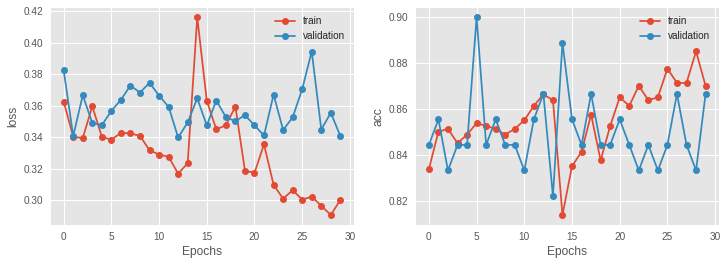

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

In [0]:
#find_data(titanic_df, 'Name', 'Astor')[selected_list].values
#find_data(titanic_df, 'Name', 'Astor')

#find_data(titanic_df, 'Name', 'Guggenheim, Mr. Benjamin')
#https://zh.wikipedia.org/wiki/%E7%8F%AD%E5%82%91%E6%98%8E%C2%B7%E5%8F%A4%E6%A0%B9%E6%B5%B7%E5%A7%86
#我們已經準備好了，就算沉沒也要像個紳士那樣

#find_data(titanic_df, 'Name', 'Byles, Rev. Thomas Roussel Davids')
#https://en.wikipedia.org/wiki/Thomas_Byles
#https://www.encyclopedia-titanica.org/images/byles_trd.jpg
#天主教神父 直到最後都在為協助乘客登入救生艇以及為受困的乘客祈禱與赦免


#find_data(test_df, 'Name', 'Rosalie Ida Blun')
#https://www.encyclopedia-titanica.org/titanic-victim/ida-straus.html
#艾達·史特勞斯63歲，一等女性乘客中少數的受害者，本來能進入8號救生艇
#最後轉身回到丈夫身邊 "We have lived together for many years. Where you go, I go."

#find_data(test_df, 'Name', 'Evans, Miss. Edith Corse')
#https://www.encyclopedia-titanica.org/titanic-victim/edith-corse-evans.html
#https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/EdithCorseEvans.jpg/220px-EdithCorseEvans.jpg
#伊迪絲·柯斯·埃文斯36歲，一等女性乘客中少數的受害者
#對Mrs Brown說"You go first, you have children waiting at home"


find_data(titanic_df, 'Name', 'Blank, Mr. Henry')
#https://www.encyclopedia-titanica.org/titanic-survivor/henry-blank.html
#https://www.encyclopedia-titanica.org/images/blank_h_01.jpg
#亨利是第一批抵達右舷船甲板的人之一，而他搭乘的7號船是第一艘降下的救生艇


,Unnamed: 0,PassengerId,Pclass,Name,Name_length,Title,Sex,Age,Age_Categories,SibSp,Parch,FamilySize,IsAlone,Ticket,Fare,Fare_Categories,Cabin,Has_Cabin,Embarked,Survived
209,209,210,1,"Blank, Mr. Henry",16,1,1,40.0,2,0,0,1,1,112277,31.0,2,A31,1,1,1


In [9]:
#model.predict(find_data(titanic_df, 'Name', 'Astor')[selected_list].values)
print(model.predict_classes(find_data(titanic_df, 'Name', 'Astor')[selected_list].values))

print(model.predict_classes(find_data(titanic_df, 'Name', 'Thomas Roussel')[selected_list].values))



[[1]]
[[0]]


In [0]:
JandR_df = pd.DataFrame(
  [ 
  [3, "Jack Dawson", 11, 1, 1, 20.0, 1, 0, 0, 1, 1, "x", 7.0, 0, "x", 0, 0, 0],
  [1, "Rose DeWitt Bukater", 19, 2, 0, 17.0, 1, 0, 0, 1, 1, "x", 20.0, 2, "x", 1, 0, 1]
  ]
, columns=['Pclass', 'Name', 'Name_length', 'Title', 'Sex', 'Age', 
           'Age_Categories', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 
           'Ticket', 'Fare', 'Fare_Categories', 'Cabin', 'Has_Cabin', 
           'Embarked','Survived'])

JandR_df

    

,Pclass,Name,Name_length,Title,Sex,Age,Age_Categories,SibSp,Parch,FamilySize,IsAlone,Ticket,Fare,Fare_Categories,Cabin,Has_Cabin,Embarked,Survived
0,3,Jack Dawson,11,1,1,20.0,1,0,0,1,1,x,7.0,0,x,0,0,0
1,1,Rose DeWitt Bukater,19,2,0,17.0,1,0,0,1,1,x,20.0,2,x,1,0,1


In [0]:
print(model.predict_classes(find_data(JandR_df, 'Name', 'Jack')[selected_list].values))
print(model.predict_classes(find_data(JandR_df, 'Name', 'Rose')[selected_list].values))

PassengerId
Embarked Fare_Categories             
0        0                        138
         1                        200
         2                        162
         3                        146
1        0                         34
         1                         11
         2                         49
         3                         74
2        0                         51
         1                          6
         2                         18
         3                          2

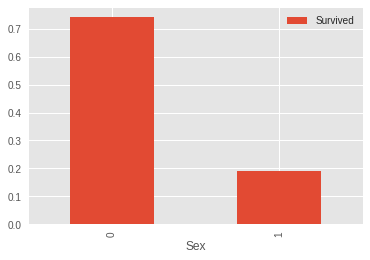

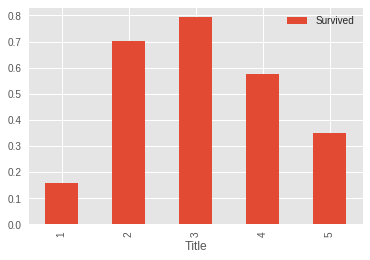

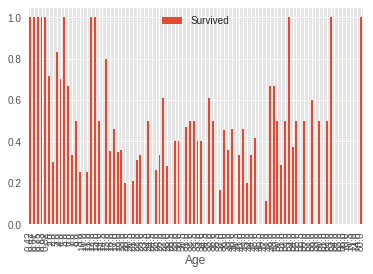

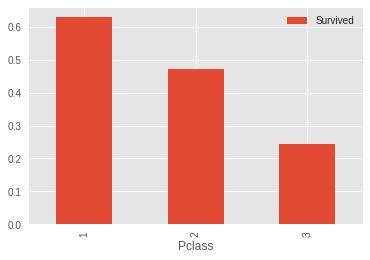

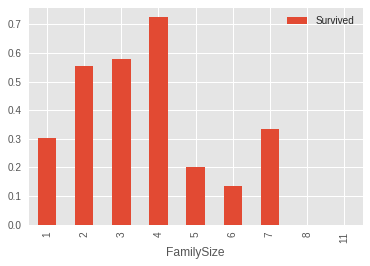

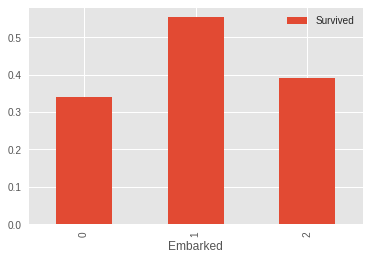

In [27]:
#'Pclass', 'Name_length', 'Title', 'Sex', 'Age', 'Age_Categories', 'SibSp', 
#'Parch', 'FamilySize', 'IsAlone', 'Fare', 'Fare_Categories', 'Has_Cabin', 'Embarked'

#titanic_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False).plot.bar()
titanic_df[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False).plot.bar()
titanic_df[["Title", "Survived"]].groupby(['Title']).mean().plot.bar()
titanic_df[["Age", "Survived"]].groupby(['Age']).mean().plot.bar()
titanic_df[["Pclass", "Survived"]].groupby(['Pclass']).mean().plot.bar()
titanic_df[["FamilySize", "Survived"]].groupby(['FamilySize']).mean().plot.bar()

titanic_df[["Embarked", "Survived"]].groupby(['Embarked']).mean().plot.bar()
#titanic_df[["Embarked", "Fare_Categories"]].groupby(['Fare_Categories']).plot.bar()

titanic_df.groupby(['Embarked', 'Fare_Categories']).count()[['PassengerId']]

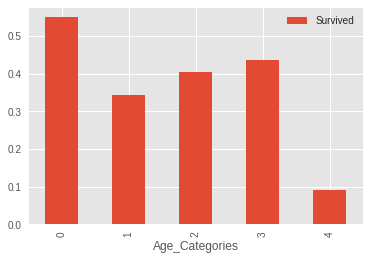

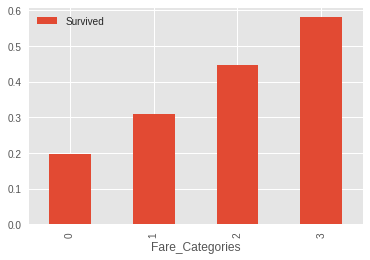

In [30]:
titanic_df[["Age_Categories", "Survived"]].groupby(['Age_Categories']).mean().plot.bar()
titanic_df[["Fare_Categories", "Survived"]].groupby(['Fare_Categories']).mean().plot.bar()

In [0]:
Y_pred = model.predict_classes(test_df[selected_list])
Y_pred = map(lambda x: x[0], Y_pred)
Y_pred = pd.Series(Y_pred)

In [0]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_tmp, train_DLy)
X_test=test_df[selected_list].values.reshape(-1, len(test_df[selected_list].loc[0]))
Y_pred = random_forest.predict(X_test)
#print(random_forest.score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
print(random_forest.score(train_tmp, train_DLy))
print (Y_pred)
X_test=test_df[selected_list]
print(X_test.loc[0:2].values.reshape(-1, len(X_test.loc[0])))


0.9865319865319865
[0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 0 1 0 0 1 0 0 1]
[[ 3.      1.      1.     34.5     1.      7.8292  0.      0.    ]
 [ 3.      3.      0.     47.      2.      7.      0.      0.    

In [0]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [0]:
submission.to_csv('submission.csv', index=False)

from google.colab import files
#uploaded = files.upload() # then browse, select the files. It's then uploaded

files.download('submission.csv')

In [0]:
titanic_df.groupby(['Pclass', 'Has_Cabin']).count()[['PassengerId']]

PassengerId
Pclass Has_Cabin             
1      0                   40
       1                  176
2      0                  168
       1                   16
3      0                  479
       1                   12

In [56]:
#find_data(titanic_df, 'Pclass', '1')
titanic_df[(titanic_df.Survived == 1)  & (titanic_df.Pclass == 1) ]

,Unnamed: 0,PassengerId,Pclass,Name,Name_length,Title,Sex,Age,Age_Categories,SibSp,Parch,FamilySize,IsAlone,Ticket,Fare,Fare_Categories,Cabin,Has_Cabin,Embarked,Survived
2,2,3,3,"Heikkinen, Miss. Laina",22,2,0,26.00,1,0,0,1,1,STON/O2. 3101282,7.9250,1,NaN,0,0,1
8,8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",49,3,0,27.00,1,0,2,3,0,347742,11.1333,1,NaN,0,0,1
10,10,11,3,"Sandstrom, Miss. Marguerite Rut",31,2,0,4.00,0,1,1,3,0,PP 9549,16.7000,2,G6,1,0,1
19,19,20,3,"Masselmani, Mrs. Fatima",23,3,0,22.00,1,0,0,1,1,2649,7.2250,0,NaN,0,1,1
22,22,23,3,"McGowan, Miss. Anna ""Annie""",27,2,0,15.00,0,0,0,1,1,330923,8.0292,1,NaN,0,2,1
25,25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",57,3,0,38.00,2,1,5,7,0,347077,31.3875,3,NaN,0,0,1
28,28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",29,2,0,22.00,1,0,0,1,1,330959,7.8792,0,NaN,0,2,1
32,32,33,3,"Glynn, Miss. Mary Agatha",24,2,0,22.00,1,0,0,1,1,335677,7.7500,0,NaN,0,2,1
36,36,37,3,"Mamee, Mr. Hanna",16,1,1,22.00,1,0,0,1,1,2677,7.2292,0,NaN,0,1,1
39,39,40,3,"Nicola-Yarred, Miss. Jamila",27,2,0,14.00,0,1,0,2,0,2651,11.2417,1,NaN,0,1,1
